In [1]:
!pip install librosa pydub matplotlib


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import wave
import contextlib
import glob
import librosa
import librosa.display
import soundfile as sf
import pandas as pd
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt

c:\Users\alagu\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [6]:
# Load audio file, the audio file should be in wav format
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/*.wav'

max = 0

for fname in glob.glob(fdir):
    y, sr = librosa.load(fname)
    duration = len(y)/sr
    max = duration if max < duration else max
    # trim silent edges
    trimmed_y, _ = librosa.effects.trim(y)
    sf.write('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/processed_data/'+fname.replace("\\", "/").split('/')[-1], trimmed_y, 48000, 'PCM_24')
max

64.51201814058957

In [7]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/*.wav'
OG_len = []
for fname in glob.glob(fdir):
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        OG_len.append(duration)
print(len(OG_len))

3159


In [8]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/processed_data/*.wav'
processed_len = []
for fname in glob.glob(fdir):
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        processed_len.append(duration)
print(len(processed_len))

3159


In [9]:
duration_df = pd.DataFrame({'original':OG_len, 'processed': processed_len})
duration_df.head()

,original,processed
0,10.288,4.726063
1,28.784,13.222667
2,9.392,4.314458
3,6.592,3.028208
4,20.480,9.408000


In [10]:
#Coimbining the audio files / it will be one file so we can easily get the image
def append_files(infiles, outfile):
    data= []
    for infile in infiles:
        w = wave.open('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/processed_data/'+infile, 'rb')
        data.append( [w.getparams(), w.readframes(w.getnframes())] )
        w.close()

    output = wave.open(outfile, 'wb')
    output.setparams(data[0][0])
    for i in range(len(data)):
        output.writeframes(data[i][1])
    output.close()

In [11]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\processed_data/'
fnames = os.listdir(fdir)
patient_ids = [fname.split('_')[0] for fname in fnames]
print(len(patient_ids))
patients = set(patient_ids)
print(len(patients))

for patient in patients:
    list_of_files = []
    for fname in fnames:
        if patient == fname.split('_')[0]:
            list_of_files.append(fname)
    append_files(list_of_files, 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\combined_data/'+patient+'.wav')

3159
941


In [12]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\combined_data/*.wav'
combined_len = []
combined_fname = []
for fname in glob.glob(fdir):
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        combined_len.append(duration)
        combined_fname.append(fname.split('/')[-1])
combined_data = pd.DataFrame({'name':combined_fname, 'length':combined_len})
combined_data.sort_values('length')

,name,length
24,the-circor-digiscope-phonocardiogram-dataset-1...,4.174812
920,the-circor-digiscope-phonocardiogram-dataset-1...,5.145000
609,the-circor-digiscope-phonocardiogram-dataset-1...,5.644812
434,the-circor-digiscope-phonocardiogram-dataset-1...,5.762417
626,the-circor-digiscope-phonocardiogram-dataset-1...,5.872667
...,...,...
318,the-circor-digiscope-phonocardiogram-dataset-1...,71.691958
304,the-circor-digiscope-phonocardiogram-dataset-1...,71.919771
162,the-circor-digiscope-phonocardiogram-dataset-1...,81.776146
60,the-circor-digiscope-phonocardiogram-dataset-1...,82.268583


AttributeError: module 'matplotlib' has no attribute 'axes'

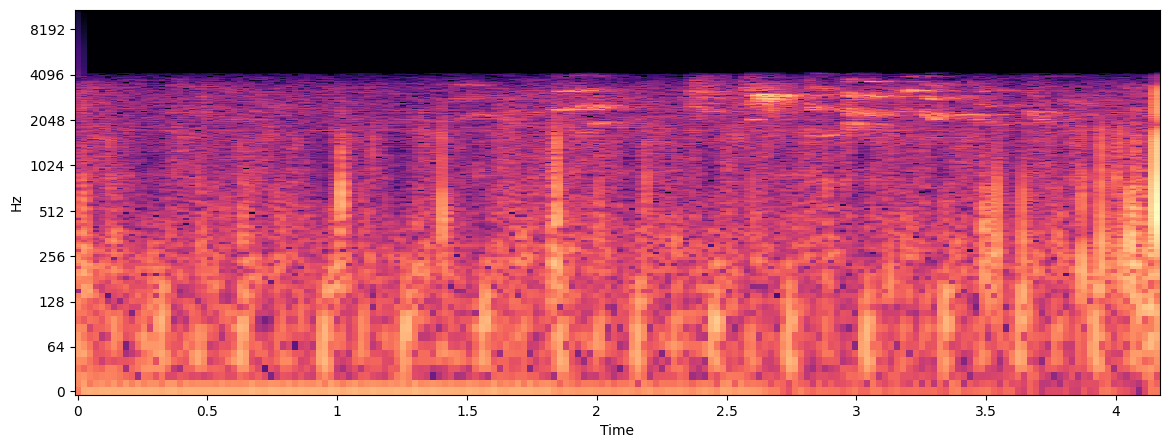

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [13]:
x, sr = librosa.load('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/combined_data/46778.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

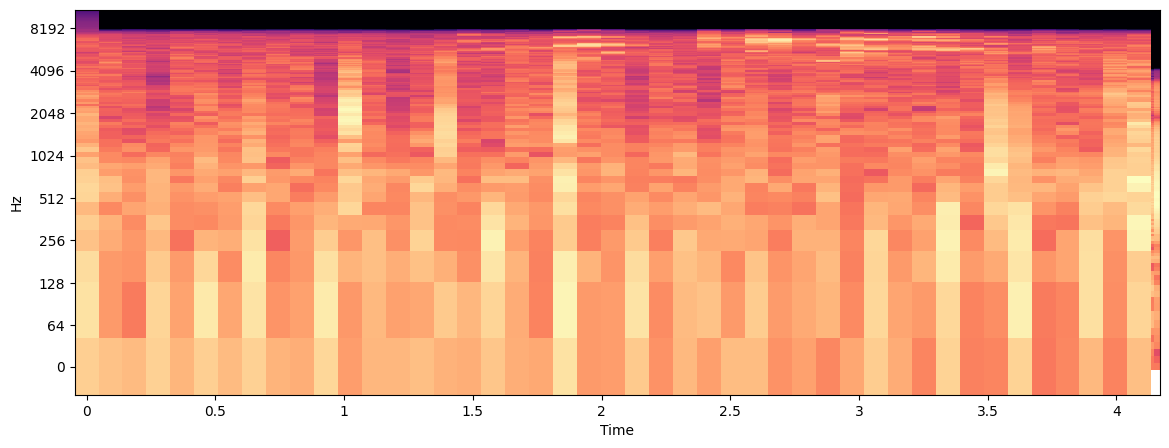

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [14]:
n_mels = 128
n_fft = 2048
y, sr = librosa.load('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/processed_data/46778_MV.wav')
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=n_fft+1, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=n_fft+1, x_axis='time', y_axis='linear')
plt.show()

In [3]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\combined_data/*.wav'
all_vals = []
durationSeconds = 250
for fname in glob.glob(fdir)[:50]:
    trim_dur = 6.4
    curr_dur = 0
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        curr_dur = frames / float(rate)
        
    if curr_dur < trim_dur:
        
        pad_ms = (trim_dur - curr_dur) # milliseconds of silence needed
        pad_hal_ms = ((pad_ms/2)+0.001)*1000
        f_silence = AudioSegment.silent(duration=pad_hal_ms)
        b_silence = AudioSegment.silent(duration=pad_hal_ms)
        audio = AudioSegment.from_wav(fname)

        padded = f_silence + audio + b_silence  # Adding silence after the audio
        padded.export('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\padded_data/'+fname.replace("\\", "/").split('/')[-1], format='wav')
        fname = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\padded_data/'+fname.replace("\\", "/").split('/')[-1]
    
    data, sr = librosa.load(fname, sr=None, mono=False)
    trimmed = librosa.util.fix_length(data, size=int(sr * durationSeconds))
    # val = librosa.feature.melspectrogram(y=trimmed, sr=sr)   
    val = librosa.amplitude_to_db(abs(librosa.stft(trimmed)))
    all_vals.append(val)

In [4]:
final_features = np.stack( all_vals, axis=0 )
print(final_features[0])

[[ -1.2259532   -3.685106   -22.984484   ... -37.594307   -37.594307
  -37.594307  ]
 [ -0.05928773   8.66088      9.020776   ... -37.594307   -37.594307
  -37.594307  ]
 [ -0.15316015  13.632738    18.147982   ... -37.594307   -37.594307
  -37.594307  ]
 ...
 [-37.594307   -37.594307   -37.594307   ... -37.594307   -37.594307
  -37.594307  ]
 [-37.594307   -37.594307   -37.594307   ... -37.594307   -37.594307
  -37.594307  ]
 [-37.594307   -37.594307   -37.594307   ... -37.594307   -37.594307
  -37.594307  ]]


In [2]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\combined_data/'
idir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3\image_data/'
missing_vals = []
for fname in glob.glob(fdir+'*.wav'):
    aud_name_ext = fname.replace("\\", "/").split('/')[-1]
    aud_name = aud_name_ext.split('.')[0]
    file_exists = os.path.exists(idir+aud_name+'.jpeg')
    if not file_exists:
        missing_vals.append(aud_name_ext)
        
print(missing_vals)  
print(len(missing_vals))  

NameError: name 'glob' is not defined

In [6]:
fdir = 'Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/combined_data/'
n_fft = 2048
n_mels=128

for audio_name in missing_vals:
    y, sr = librosa.load('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/combined_data/'+audio_name)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=n_fft+1, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_DB, sr=sr, hop_length=n_fft+1)
    plt.savefig('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/remaining/'+audio_name.replace("\\", "/").split('.')[0]+'.jpeg')
    

KeyboardInterrupt: 

### Feature Extraction

In [ ]:
#Using the meta data to match with patients id to audio outcome
labels = []
classes = ['Normal', 'Abnormal']

meta_data = pd.read_csv("Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data.csv")
meta_data.head()

In [ ]:
for img_file in os.listdir('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/remaining/'):
    file_name = int(img_file.split('.')[0])
    label = meta_data.loc[meta_data['Patient ID'] == file_name]['Outcome'].values[0]    
    labels.append(classes.index(label))
len(labels)

In [ ]:
from keras.utils import image_dataset_from_directory

data_set = image_dataset_from_directory('Dataset/the-circor-digiscope-phonocardiogram-dataset-1.0.3/remaining/',labels=labels)
data_set[0]

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_set, test_size=0.2)

In [ ]:
from keras.layers import Conv2D, GlobalMaxPooling2D, Dense
from keras.models import Sequential

cnn_model = Sequential()
cnn_model.add(Conv2D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling2D())
cnn_model.add(Dense(3, activation='sigmoid'))

cnn_model.compile()